# Mixscape Norman 2019

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [1]:
from pathlib import Path
import sys
sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [2]:
common_config.figure_jupyter()

In [3]:
import pertpy as pt
import scanpy as sc

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

## Data overview

In [4]:
adata = pt.dt.norman_2019()

In [5]:
adata.obs

guide_identity  read_count  \
index                                                                    
AAACCTGAGAAGAAGC-1    NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0        1252   
AAACCTGAGGCATGTG-1      TSC22D1_NegCtrl0__TSC22D1_NegCtrl0        2151   
AAACCTGAGGCCCTTG-1                KLF1_MAP2K6__KLF1_MAP2K6        1037   
AAACCTGCACGAAGCA-1  NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0         958   
AAACCTGCAGACGTAG-1            CEBPE_RUNX1T1__CEBPE_RUNX1T1         244   
...                                                    ...         ...   
TTTGTCATCAGTACGT-8          FOXA3_NegCtrl0__FOXA3_NegCtrl0        2068   
TTTGTCATCCACTCCA-8          CELF2_NegCtrl0__CELF2_NegCtrl0         829   
TTTGTCATCCCAACGG-8        BCORL1_NegCtrl0__BCORL1_NegCtrl0         136   
TTTGTCATCCTCCTAG-8            ZBTB10_PTPN12__ZBTB10_PTPN12        1254   
TTTGTCATCTGGCGAC-8        MAP4K3_NegCtrl0__MAP4K3_NegCtrl0        1226   

                    UMI_count   coverage  gemgroup  good_coverage  \
index                                                               
AAACCTGAGAAGAAGC-1         67  18.686567         1           True   
AAACCTGAGGCATGTG-1        104  20.682692         1           True   
AAACCTGAGGCCCTTG-1         59  17.576271         1           True   
AAACCTGCACGAAGCA-1         39  24.564103         1           True   
AAACCTGCAGACGTAG-1         14  17.428571         1           True   
...                       ...        ...       ...            ...   
TTTGTCATCAGTACGT-8         95  21.768421         8           True   
TTTGTCATCCACTCCA-8         33  25.121212         8           True   
TTTGTCATCCCAACGG-8          9  15.111111         8           True   
TTTGTCATCCTCCTAG-8         59  21.254237         8           True   
TTTGTCATCTGGCGAC-8         59  20.779661         8           True   

                    number_of_cells  guide_AHR  guide_ARID1A  guide_ARRDC3  \
index                                                                        
AAACCTGAGAAGAAGC-1                2          0             0             0   
AAACCTGAGGCATGTG-1                1          0             0             0   
AAACCTGAGGCCCTTG-1                1          0             0             0   
AAACCTGCACGAAGCA-1                1          0             0             0   
AAACCTGCAGACGTAG-1                1          0             0             0   
...                             ...        ...           ...           ...   
TTTGTCATCAGTACGT-8                1          0             0             0   
TTTGTCATCCACTCCA-8                1          0             0             0   
TTTGTCATCCCAACGG-8                1          0             0             0   
TTTGTCATCCTCCTAG-8                3          0             0             0   
TTTGTCATCTGGCGAC-8                1          0             0             0   

                    ...  n_genes  n_genes_by_counts  total_counts  \
index               ...                                             
AAACCTGAGAAGAAGC-1  ...     4108               4108       19413.0   
AAACCTGAGGCATGTG-1  ...     3142               3142       13474.0   
AAACCTGAGGCCCTTG-1  ...     4229               4229       23228.0   
AAACCTGCACGAAGCA-1  ...     2114               2114        6842.0   
AAACCTGCAGACGTAG-1  ...     2753               2753        9130.0   
...                 ...      ...                ...           ...   
TTTGTCATCAGTACGT-8  ...     3305               3305       14727.0   
TTTGTCATCCACTCCA-8  ...     2842               2842        9750.0   
TTTGTCATCCCAACGG-8  ...     2824               2824        8670.0   
TTTGTCATCCTCCTAG-8  ...     5180               5179       29247.0   
TTTGTCATCTGGCGAC-8  ...     3058               3058       12514.0   

                    total_counts_mt  pct_counts_mt  leiden  perturbation_name  \
index                                                                           
AAACCTGAGAAGAAGC-1           1327.0       6.835625      10            control   
AAACCTGAGGCATGTG-1         

In [6]:
sc.pp.neighbors(adata)

In [7]:
sc.pp.pca(adata)

In [8]:
sc.tl.umap(adata)

/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


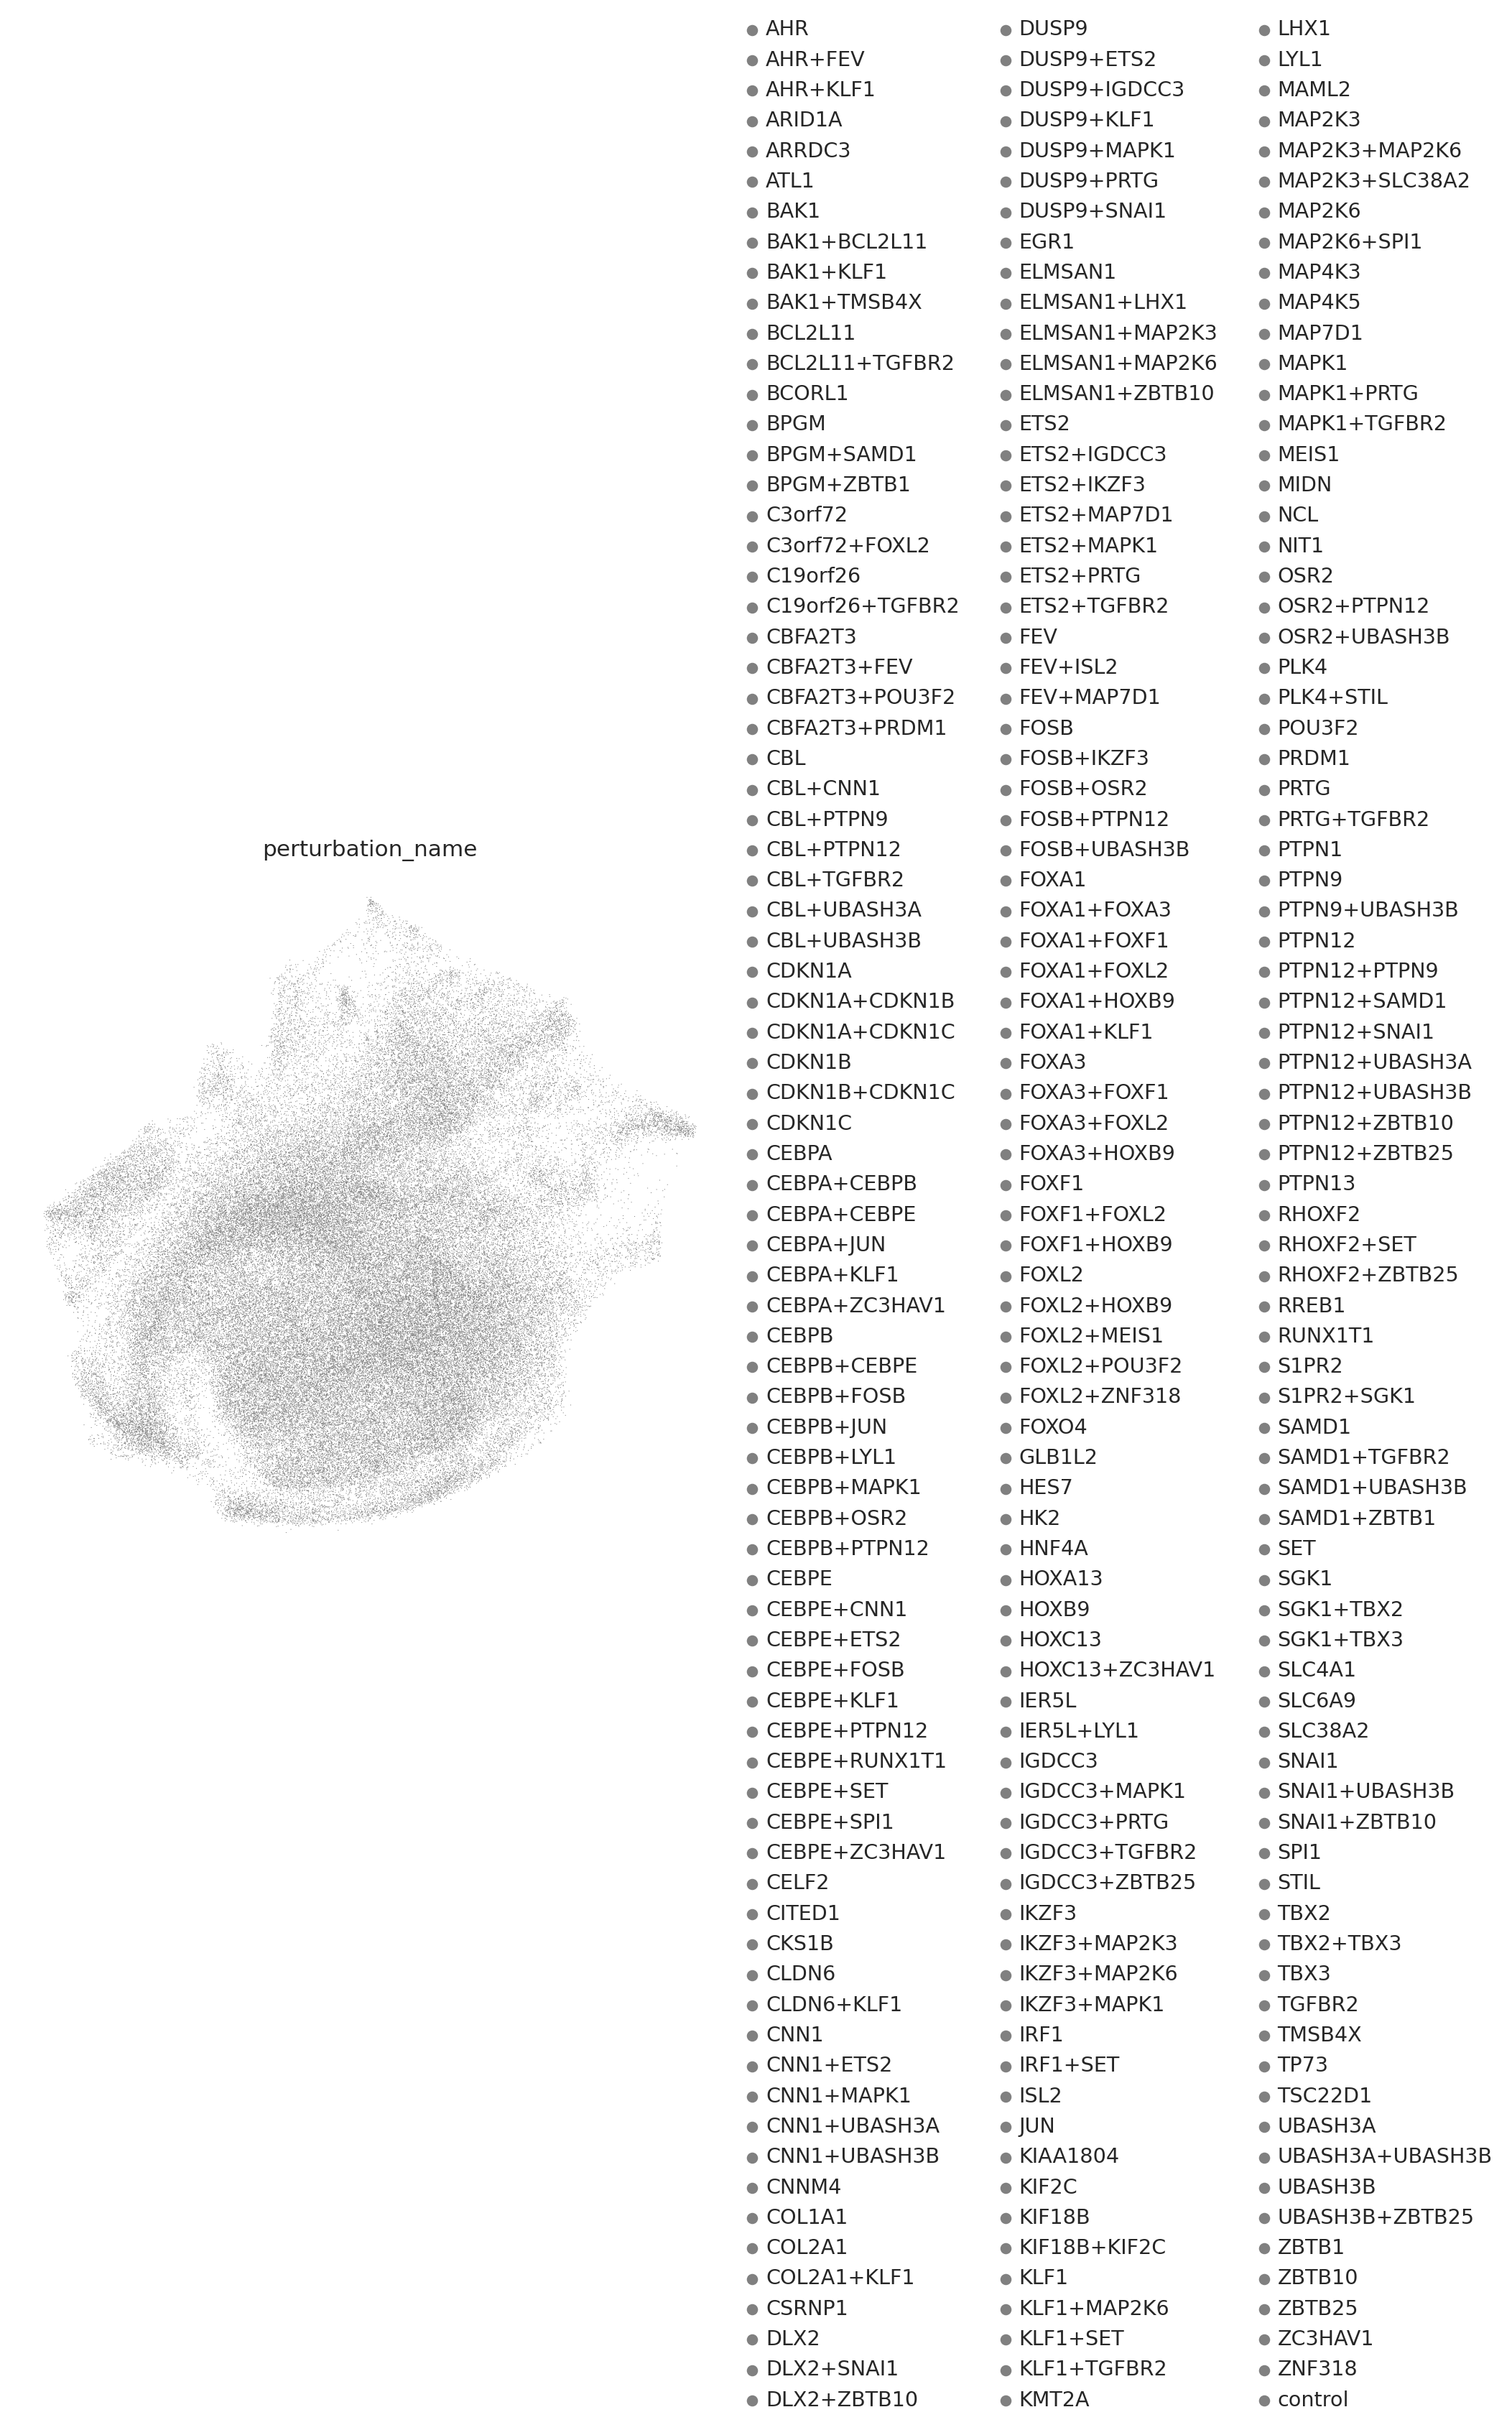

In [9]:
sc.pl.umap(adata, color="perturbation_name")

## Apply mixscape

In [10]:
sc.pp.normalize_total(adata)

In [11]:
sc.pp.log1p(adata)

In [12]:
sc.pp.highly_variable_genes(adata, subset=True)

/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [13]:
pt_ms = pt.tl.Mixscape()

In [14]:
pt_ms.perturbation_signature(adata, pert_key='perturbation_name', control='control')

/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/scipy/sparse/_index.py:134: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


In [15]:
adata_pert = adata.copy()

In [16]:
adata_pert

AnnData object with n_obs × n_vars = 111255 × 1441
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'gemgroup', 'good_coverage', 'number_of_cells', 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_FOXF1', 'guide_FOXL2', 'guide_FOXO4', 'guide_GLB1L2', 'guide_HES7', 'guide_HK2', 'guide_HNF4A', 'guide_HOXA13', 'guide_HOXB9', 'guide_HOXC13', 'guide_IER5L', 'guide_IGDCC3', 'guide_IKZF3', 'guide_IRF1', 'guide_ISL2', 'guide_JUN', 'guide_KIAA1804', 'guide_KIF18B', 'guide_KIF2C', 'g

In [17]:
adata_pert.X = adata_pert.layers['X_pert']

In [18]:
sc.pp.pca(adata_pert)

In [19]:
sc.pp.neighbors(adata_pert, metric='cosine')

In [20]:
sc.tl.umap(adata_pert)

/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


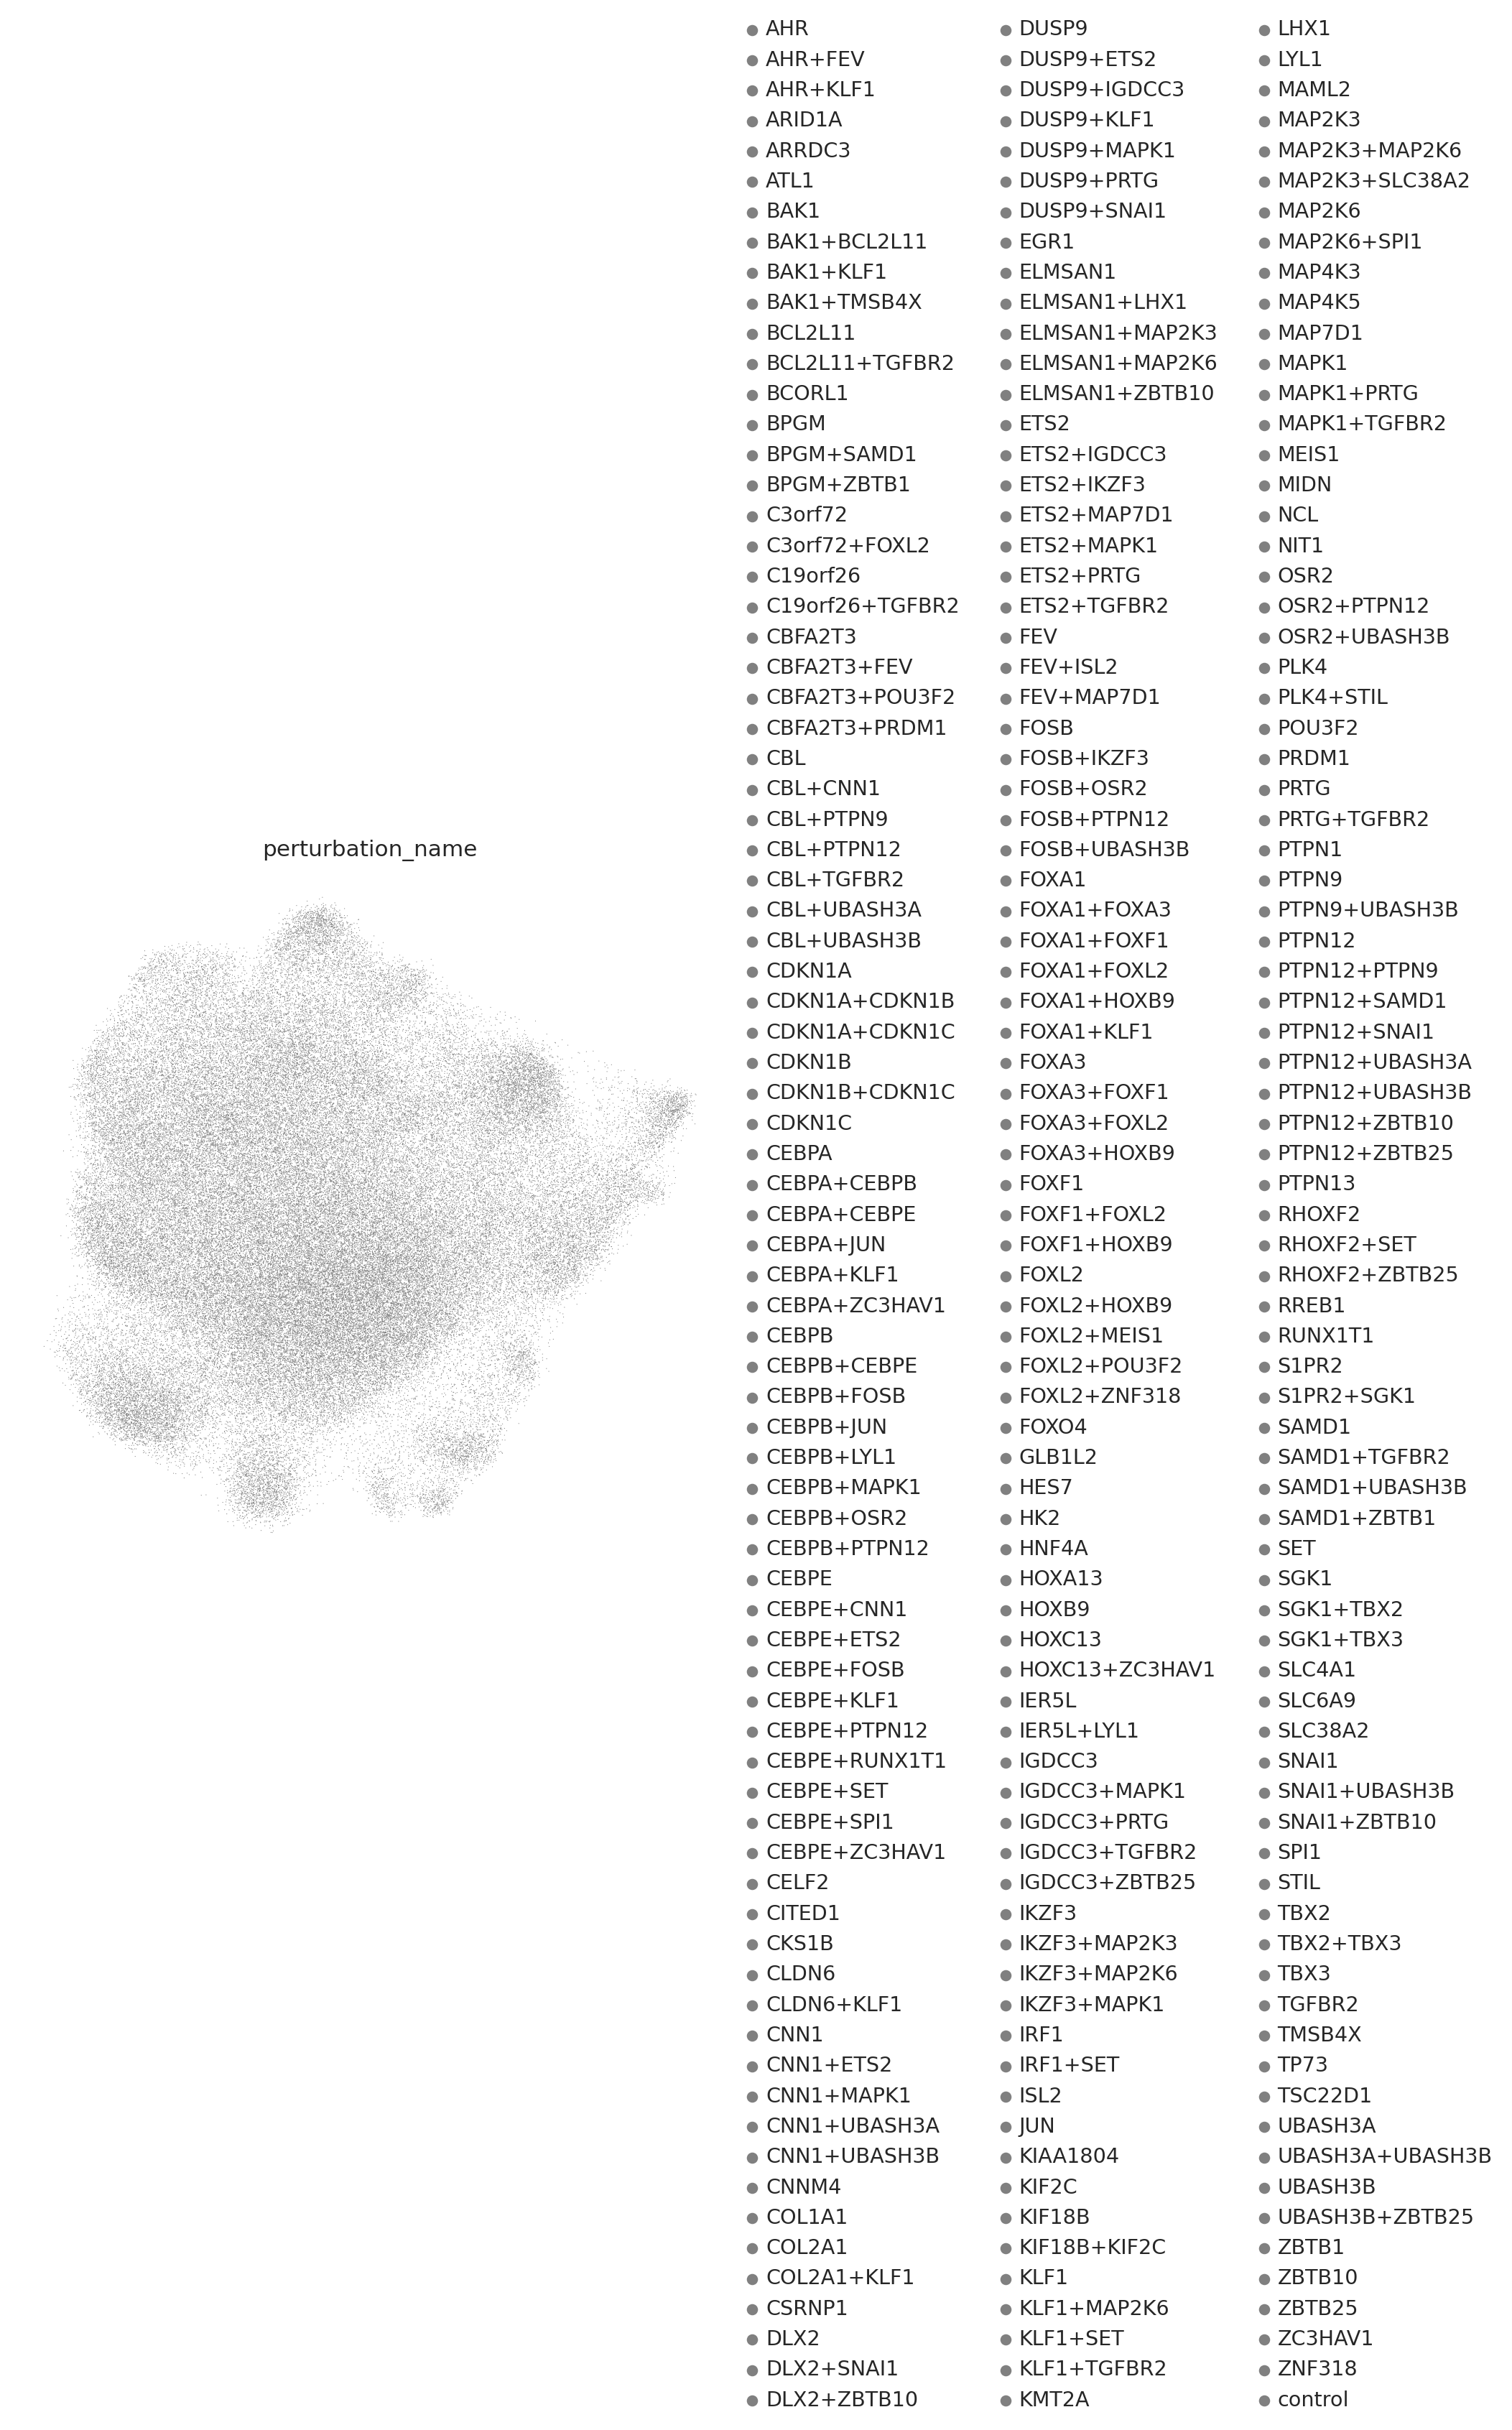

In [21]:
sc.pl.umap(adata_pert, color='perturbation_name')

In [38]:
adata.obs["guide_ids"] = adata.obs["guide_ids"].cat.rename_categories({ "": "control" })

In [40]:
pt_ms.mixscape(adata = adata, control = 'control', labels='guide_ids', layer='X_pert')

/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_

In [43]:
adata.obs

guide_identity  read_count  \
index                                                                    
AAACCTGAGAAGAAGC-1    NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0        1252   
AAACCTGAGGCATGTG-1      TSC22D1_NegCtrl0__TSC22D1_NegCtrl0        2151   
AAACCTGAGGCCCTTG-1                KLF1_MAP2K6__KLF1_MAP2K6        1037   
AAACCTGCACGAAGCA-1  NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0         958   
AAACCTGCAGACGTAG-1            CEBPE_RUNX1T1__CEBPE_RUNX1T1         244   
...                                                    ...         ...   
TTTGTCATCAGTACGT-8          FOXA3_NegCtrl0__FOXA3_NegCtrl0        2068   
TTTGTCATCCACTCCA-8          CELF2_NegCtrl0__CELF2_NegCtrl0         829   
TTTGTCATCCCAACGG-8        BCORL1_NegCtrl0__BCORL1_NegCtrl0         136   
TTTGTCATCCTCCTAG-8            ZBTB10_PTPN12__ZBTB10_PTPN12        1254   
TTTGTCATCTGGCGAC-8        MAP4K3_NegCtrl0__MAP4K3_NegCtrl0        1226   

                    UMI_count   coverage  gemgroup  good_coverage  \
index                                                               
AAACCTGAGAAGAAGC-1         67  18.686567         1           True   
AAACCTGAGGCATGTG-1        104  20.682692         1           True   
AAACCTGAGGCCCTTG-1         59  17.576271         1           True   
AAACCTGCACGAAGCA-1         39  24.564103         1           True   
AAACCTGCAGACGTAG-1         14  17.428571         1           True   
...                       ...        ...       ...            ...   
TTTGTCATCAGTACGT-8         95  21.768421         8           True   
TTTGTCATCCACTCCA-8         33  25.121212         8           True   
TTTGTCATCCCAACGG-8          9  15.111111         8           True   
TTTGTCATCCTCCTAG-8         59  21.254237         8           True   
TTTGTCATCTGGCGAC-8         59  20.779661         8           True   

                    number_of_cells  guide_AHR  guide_ARID1A  guide_ARRDC3  \
index                                                                        
AAACCTGAGAAGAAGC-1                2          0             0             0   
AAACCTGAGGCATGTG-1                1          0             0             0   
AAACCTGAGGCCCTTG-1                1          0             0             0   
AAACCTGCACGAAGCA-1                1          0             0             0   
AAACCTGCAGACGTAG-1                1          0             0             0   
...                             ...        ...           ...           ...   
TTTGTCATCAGTACGT-8                1          0             0             0   
TTTGTCATCCACTCCA-8                1          0             0             0   
TTTGTCATCCCAACGG-8                1          0             0             0   
TTTGTCATCCTCCTAG-8                3          0             0             0   
TTTGTCATCTGGCGAC-8                1          0             0             0   

                    ...  total_counts_mt  pct_counts_mt  leiden  \
index               ...                                           
AAACCTGAGAAGAAGC-1  ...           1327.0       6.835625      10   
AAACCTGAGGCATGTG-1  ...            962.0       7.139676       3   
AAACCTGAGGCCCTTG-1  ...           1548.0       6.664371       7   
AAACCTGCACGAAGCA-1  ...            523.0       7.643963       2   
AAACCTGCAGACGTAG-1  ...            893.0       9.780942      10   
...                 ...              ...            ...     ...   
TTTGTCATCAGTACGT-8  ...            898.0       6.097644       3   
TTTGTCATCCACTCCA-8  ...            566.0       5.805128      10   
TTTGTCATCCCAACGG-8  ...            490.0       5.651672       4   
TTTGTCATCCTCCTAG-8  ...           1551.0       5.303108       5   
TTTGTCATCTGGCGAC-8  ...            864.0       6.904267       0   

                    perturbation_name  perturbation_type  perturbation_value  \
index                                                                          
AAACCTGAGAAGAAGC-1            control            genetic                 NaN   
AAACCTGAGGCATGTG-1            TSC22D1            genetic

In [47]:
adata.var_names

Index(['FO538757.2', 'SAMD11', 'ISG15', 'MXRA8', 'MIB2', 'MMP23B', 'SLC35E2B',
       'SMIM1', 'PGD', 'SRM',
       ...
       'RRP1B', 'ITGB2', 'ITGB2-AS1', 'COL18A1', 'SPATC1L', 'C21orf58',
       'MT-ATP6', 'MT-ND4', 'MT-ND6', 'MT-CYB'],
      dtype='object', name='gene_symbols', length=1441)

/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zeth/miniconda3/envs/pertpy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

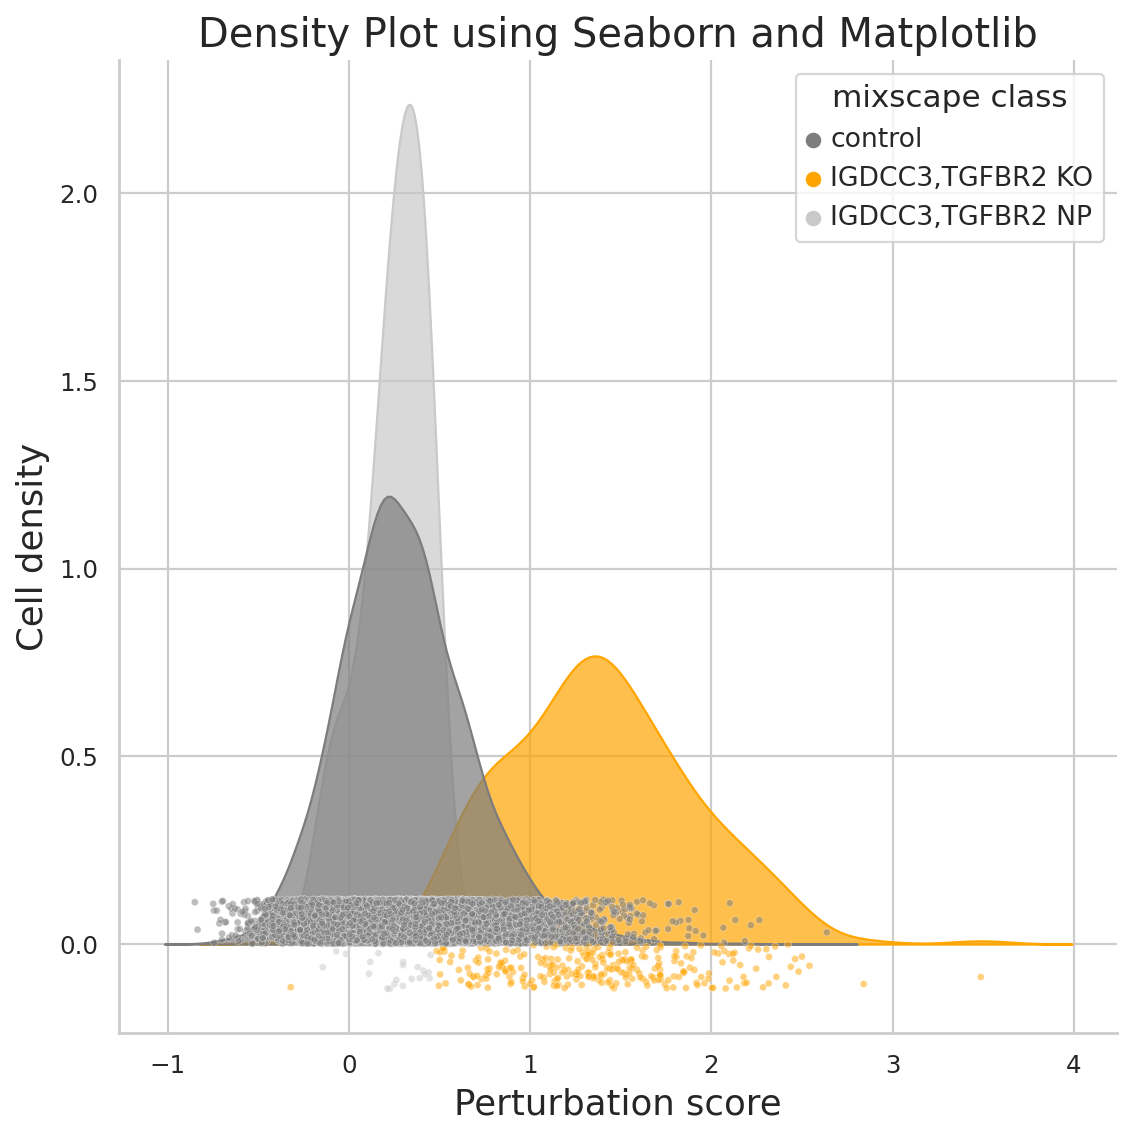

In [53]:
_ = pt_ms.plot_perturbscore(adata = adata, labels='guide_ids', target_gene='IGDCC3,TGFBR2', color = 'orange')